**Task 1**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('Dataset2 .csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,5701052,Applebee's,214,Abu Dhabi,"Level 3, Mushrif Mall, Al Mushrif, Abu Dhabi","Mushrif Mall, Al Mushrif","Mushrif Mall, Al Mushrif, Abu Dhabi",54.413141,24.434099,"American, Mexican, Seafood",...,Emirati Diram(AED),No,Yes,No,No,4,4.0,Green,Very Good,205
1,5701548,Bait El Khetyar,214,Abu Dhabi,"Al Najda Street, Najda, Abu Dhabi",Najda,"Najda, Abu Dhabi",54.371434,24.488411,"Lebanese, Arabian, Middle Eastern",...,Emirati Diram(AED),No,Yes,No,No,2,4.0,Green,Very Good,380
2,5700052,Cho Gao - Crowne Plaza Abu Dhabi,214,Abu Dhabi,"Crowne Plaza Abu Dhabi, Sheikh Hamdan Bin Moha...","Crowne Plaza Abu Dhabi, Al Markaziya","Crowne Plaza Abu Dhabi, Al Markaziya, Abu Dhabi",54.365694,24.491235,"Thai, Japanese, Chinese, Indonesian, Vietnamese",...,Emirati Diram(AED),Yes,Yes,No,No,4,4.4,Green,Very Good,246
3,18212135,Denny's,214,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)...","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah...",54.382797,24.495503,American,...,Emirati Diram(AED),No,No,No,No,4,4.6,Dark Green,Excellent,207
4,5704255,Famous Dave's Barbecue,214,Abu Dhabi,"Near The One, Level 3, Abu Dhabi Mall, Tourist...","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah...",54.382946,24.495693,American,...,Emirati Diram(AED),No,Yes,No,No,4,4.6,Dark Green,Excellent,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,7100788,The Crab Shack,148,Wellington City,"15 Jervois Quay, Queens Wharf, Wellington Cent...",Wellington Central,"Wellington Central, Wellington City",174.779167,-41.284833,"Seafood, Kiwi",...,NewZealand($),No,No,No,No,4,4.1,Green,Very Good,229
9547,7101042,The Hangar,148,Wellington City,"171-177 Willis Street, Te Aro, Wellington City",Te Aro,"Te Aro, Wellington City",174.773933,-41.290801,Cafe,...,NewZealand($),No,No,No,No,3,4.6,Dark Green,Excellent,171
9548,7100938,wagamama,148,Wellington City,"33 Customhouse Quay, Wellington Central, Welli...",Wellington Central,"Wellington Central, Wellington City",174.779224,-41.283034,"Japanese, Asian",...,NewZealand($),No,No,No,No,4,3.7,Yellow,Good,131
9549,17559793,Fishpatrick's Crabby Cafe,216,Winchester Bay,"196 Bayfront Loop, Winchester Bay, OR 97467",Winchester Bay,"Winchester Bay, Winchester Bay",-124.175346,43.678998,"Burger, Seafood, Steak",...,Dollar($),No,No,No,No,2,3.2,Orange,Average,16


In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       Restaurant ID                   Restaurant Name  Country Code  \
0           5701052                        Applebee's           214   
1           5701548                   Bait El Khetyar           214   
2           5700052  Cho Gao - Crowne Plaza Abu Dhabi           214   
3          18212135                           Denny's           214   
4           5704255            Famous Dave's Barbecue           214   
...             ...                               ...           ...   
9546        7100788                    The Crab Shack           148   
9547        7101042                        The Hangar           148   
9548        7100938                          wagamama           148   
9549       17559793         Fishpatrick's Crabby Cafe           216   
9550       16668008                     Arigato Sushi            37   

                 City                                            Address  \
0           Abu Dhabi       

**Analyze the text reviews to identify the most common postive and negative reviews**

In [11]:
kpi = df[['Rating text']]
kpi

,Rating text
0,Very Good
1,Very Good
2,Very Good
3,Excellent
4,Excellent
...,...
9546,Very Good
9547,Excellent
9548,Good
9549,Average


In [13]:
kpi["Rating text"].str.strip()
kpi["Rating text"].str.lower()
kpi

,Rating text
0,Very Good
1,Very Good
2,Very Good
3,Excellent
4,Excellent
...,...
9546,Very Good
9547,Excellent
9548,Good
9549,Average


In [38]:
print("Keyword Lists:")
print("Positive Keywords:", positive_terms)
print("Neutral Keywords:", neutral_terms)
print("Negative Keywords:", negative_terms)

print("\nReviews")
print(kpi["Rating text"].unique())

Keyword Lists:
Positive Keywords: ['Excellent', 'Very Good', 'Good']
Neutral Keywords: ['Average']
Negative Keywords: ['Not rated', 'Poor']

Reviews
['Very Good' 'Excellent' 'Good' 'Average' 'Poor' 'Not rated']


In [15]:
positive_terms = ["Excellent", "Very Good", "Good"]
neutral_terms = ["Average"]
negative_terms = ["Not rated", "Poor"]

In [40]:
def classify_sentiment(review):
    if review in positive_terms:
        return "Positive"
    elif review in neutral_terms:
        return "Neutral"
    elif review in negative_terms:
        return "Negative"
    else:
        return "Unknown"

kpi["Sentiment"] = kpi["Rating text"].apply(classify_sentiment)
kpi

C:\Users\pc\AppData\Local\Temp\ipykernel_4220\2884105491.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpi["Sentiment"] = kpi["Rating text"].apply(classify_sentiment)


,Rating text,Aggregate rating,Review_length,Sentiment
0,Very Good,4.0,9,Positive
1,Very Good,4.0,9,Positive
2,Very Good,4.4,9,Positive
3,Excellent,4.6,9,Positive
4,Excellent,4.6,9,Positive
...,...,...,...,...
9546,Very Good,4.1,9,Positive
9547,Excellent,4.6,9,Positive
9548,Good,3.7,4,Positive
9549,Average,3.2,7,Neutral


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
word_matrix = vectorizer.fit_transform(kpi["Rating text"])
word_counts = word_matrix.sum(axis = 0).A1
words = vectorizer.get_feature_names_out()

word_frequencies = dict(zip(words, word_counts))
print("word Frequencies:", word_frequencies)

word Frequencies: {'average': 3737, 'excellent': 301, 'good': 3179, 'not': 2148, 'poor': 186, 'rated': 2148, 'very': 1079}


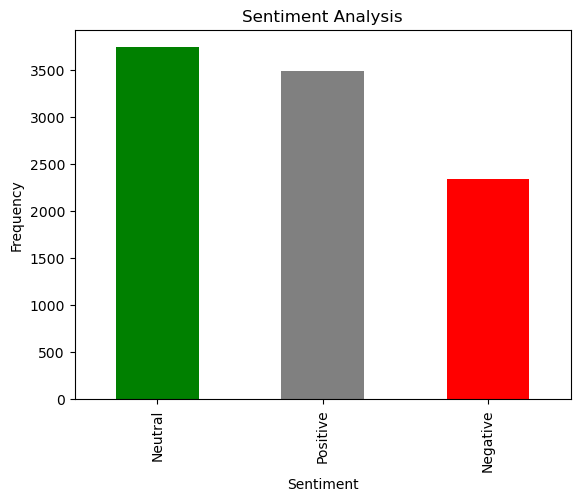

In [23]:
sentiment_counts = kpi["Sentiment"].value_counts()
sentiment_counts.plot(kind = "bar", color = ["green", "gray", "red"])
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()

**Calculate the average length of review and explore if their is a relationship between the review length and rating**

In [26]:
kpi = df[["Rating text", "Aggregate rating"]]
kpi

,Rating text,Aggregate rating
0,Very Good,4.0
1,Very Good,4.0
2,Very Good,4.4
3,Excellent,4.6
4,Excellent,4.6
...,...,...
9546,Very Good,4.1
9547,Excellent,4.6
9548,Good,3.7
9549,Average,3.2


In [28]:
kpi["Review_length"] = kpi["Rating text"].apply(len)
kpi

C:\Users\pc\AppData\Local\Temp\ipykernel_4220\2629133750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpi["Review_length"] = kpi["Rating text"].apply(len)


,Rating text,Aggregate rating,Review_length
0,Very Good,4.0,9
1,Very Good,4.0,9
2,Very Good,4.4,9
3,Excellent,4.6,9
4,Excellent,4.6,9
...,...,...,...
9546,Very Good,4.1,9
9547,Excellent,4.6,9
9548,Good,3.7,4
9549,Average,3.2,7


In [30]:
average_review_length = kpi["Review_length"].mean()
print(f"Average Review Length: {average_review_length}")

Average Review Length: 7.020730813527379


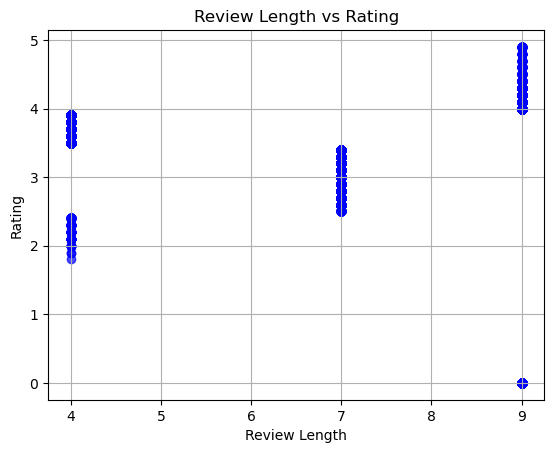

In [32]:
plt.scatter(kpi["Review_length"], kpi["Aggregate rating"], alpha = 0.7, color = 'blue')
plt.title("Review Length vs Rating")
plt.xlabel("Review Length")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

In [34]:
correlation = kpi["Review_length"].corr(kpi["Aggregate rating"])
print(f"Correlation between Review Length and Rating: {correlation}")

Correlation between Review Length and Rating: -0.4788848381349318


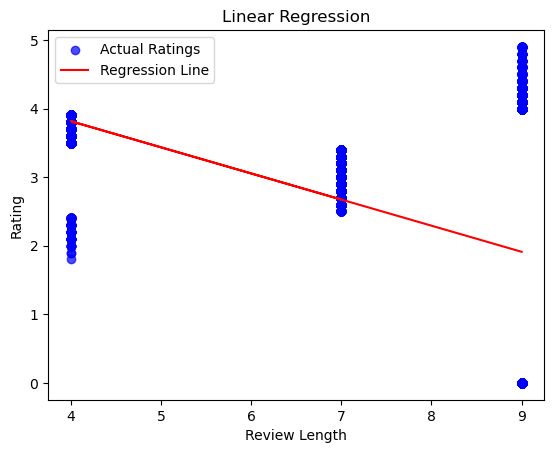

coefficient: -0.3810559125673267, Intercept: 5.341661000649365


In [36]:
from sklearn.linear_model import LinearRegression

x = kpi["Review_length"].values.reshape(-1, 1)
y = kpi["Aggregate rating"]

model = LinearRegression()
model.fit(x, y)

predicted = model.predict(x)

plt.scatter(x , y, alpha = 0.7, color = 'blue', label = "Actual Ratings")
plt.plot(x, predicted, color = 'red', label = "Regression Line")
plt.title("Linear Regression")
plt.xlabel("Review Length")
plt.ylabel("Rating")
plt.legend()
plt.show()

print(f"coefficient: {model.coef_[0]}, Intercept: {model.intercept_}") 